# 1. Introduction

In this notebook, we will analyze the Student Performance Factors dataset from Kaggle to identify key factors influencing student performance. We will begin by loading the dataset and performing Exploratory Data Analysis (EDA) to uncover patterns and trends. Finally, we will conduct hypothesis testing to validate assumptions and gain deeper insights into the impact of various factors on academic success. Good academic performance is crucial as it not only opens doors to future opportunities but also helps in building the skills necessary for personal and professional growth.

# 1.1 Importing libraries 

To efficiently analyze and visualize the dataset, we need to import several essential libraries. Pandas will help us manage and manipulate the data, while NumPy will assist with numerical operations. For data visualization, Seaborn and Matplotlib will allow us to create insightful plots and graphs, aiding in the exploration of patterns and trends in the dataset.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1.2 Loading the dataset

We begin by loading the dataset using Pandas' read_csv() function, which allows us to import the data from a CSV file. The print(data.shape) command provides the dimensions of the dataset, revealing that it has 6607 rows (individuals) and 20 columns (features). This means we have data for 6607 students, each with 20 different characteristics or attributes.

In [5]:
data = pd.read_csv('StudentPerformanceFactors.csv')
print(data.shape)

(6607, 20)


In [3]:
data.head(10)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
5,19,88,Medium,Medium,Yes,8,89,Medium,Yes,3,Medium,Medium,Public,Positive,3,No,Postgraduate,Near,Male,71
6,29,84,Medium,Low,Yes,7,68,Low,Yes,1,Low,Medium,Private,Neutral,2,No,High School,Moderate,Male,67
7,25,78,Low,High,Yes,6,50,Medium,Yes,1,High,High,Public,Negative,2,No,High School,Far,Male,66
8,17,94,Medium,High,No,6,80,High,Yes,0,Medium,Low,Private,Neutral,1,No,College,Near,Male,69
9,23,98,Medium,Medium,Yes,8,71,Medium,Yes,0,High,High,Public,Positive,5,No,High School,Moderate,Male,72


# 1.3 Feature Description
- Hours_Studied (int) – Number of hours a student spends studying.
- Attendance (int) – Attendance percentage or number of days attended.
- Parental_Involvement (object) – Level of parental engagement in academics (Low, Medium, High).
- Access_to_Resources (object) – Availability of academic resources (Low, Medium, High).
- Extracurricular_Activities (object) – Whether the student participates in extracurricular activities (Yes, No).
- Sleep_Hours (int) – Average number of hours a student sleeps per night.
- Previous_Scores (int) – Previous exam or academic scores.
- Motivation_Level (object) – Self-reported motivation level (Low, Medium, High).
- Internet_Access (object) – Whether the student has internet access at home (Yes, No).
- Tutoring_Sessions (int) – Number of tutoring sessions attended.
- Family_Income (object) – Family’s financial status (Low, Medium, High).
- Teacher_Quality (object) – Perceived quality of teaching (Low, Medium, High).
- School_Type (object) – Type of school attended (Public, Private).
- Peer_Influence (object) – Influence of peers on academics (Positive, Negative, Neutral).
- Physical_Activity (int) – Hours spent on physical activity per week.
- Learning_Disabilities (object) – Whether the student has a learning disability (Yes, No).
- Parental_Education_Level (object) – Highest education level attained by parents (High School, College, Postgraduate).
- Distance_from_Home (object) – Distance of the school from home (Near, Moderate, Far).
- Gender (object) – Student’s gender (Male, Female).
- Exam_Score (int) – Final exam score (target variable)

# 2. Exploratory Data Analysis (EDA)
Before conducting deeper analysis, we first explore the dataset using visualization techniques and check for missing values. Visualizing numerical features helps us understand their distribution, detect potential outliers, and identify patterns that may influence student performance.
Additionally, checking for missing values ensures data completeness and helps us decide on appropriate preprocessing steps, such as imputing missing values or handling inconsistencies.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

The .describe() function in pandas provides statistical summaries of numerical columns in a DataFrame.

In [5]:
data.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [6]:
print(data.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


Number of missing values in each column:

In [7]:
print(data.isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


# 2.1. Visualizing numerical columns

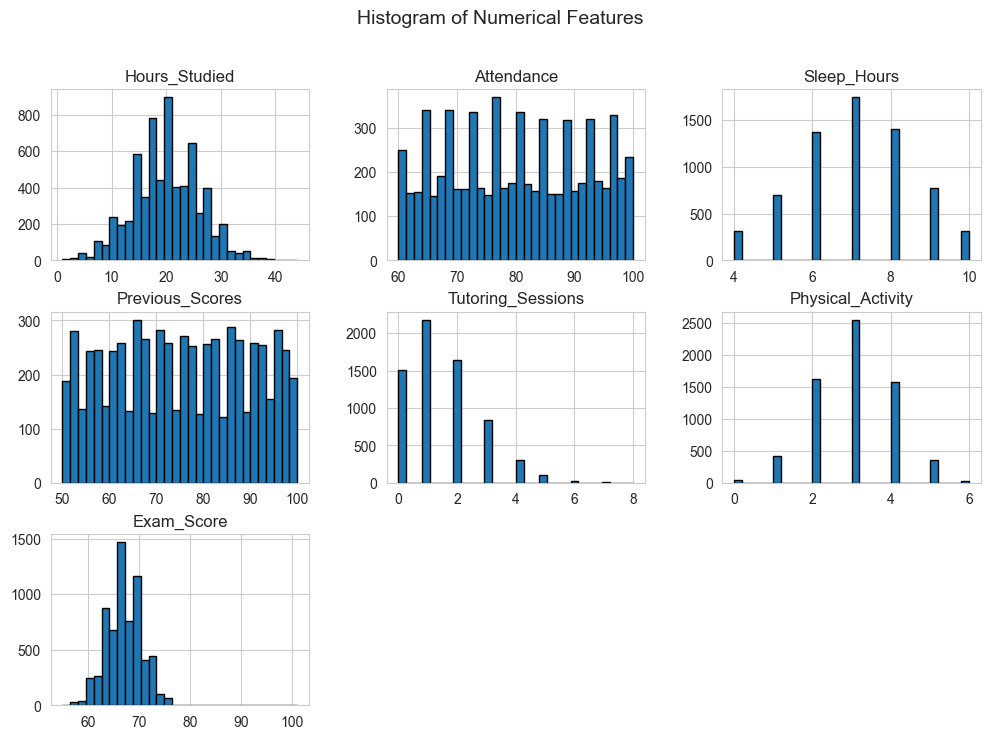

In [8]:
numerical_columns = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
    'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'
]

sns.set_style("whitegrid")

data[numerical_columns].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numerical Features", fontsize=14)
plt.show()

# 2.2. Visualizing Categorical columns

C:\Users\Sara\AppData\Local\Temp\ipykernel_15856\1447100747.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")
C:\Users\Sara\AppData\Local\Temp\ipykernel_15856\1447100747.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")
C:\Users\Sara\AppData\Local\Temp\ipykernel_15856\1447100747.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette="Set2")
C:\Users\Sara\AppData\Local\Temp\ipykernel_15856\1447100747.py:12: FutureWarning: 

Passing `palette

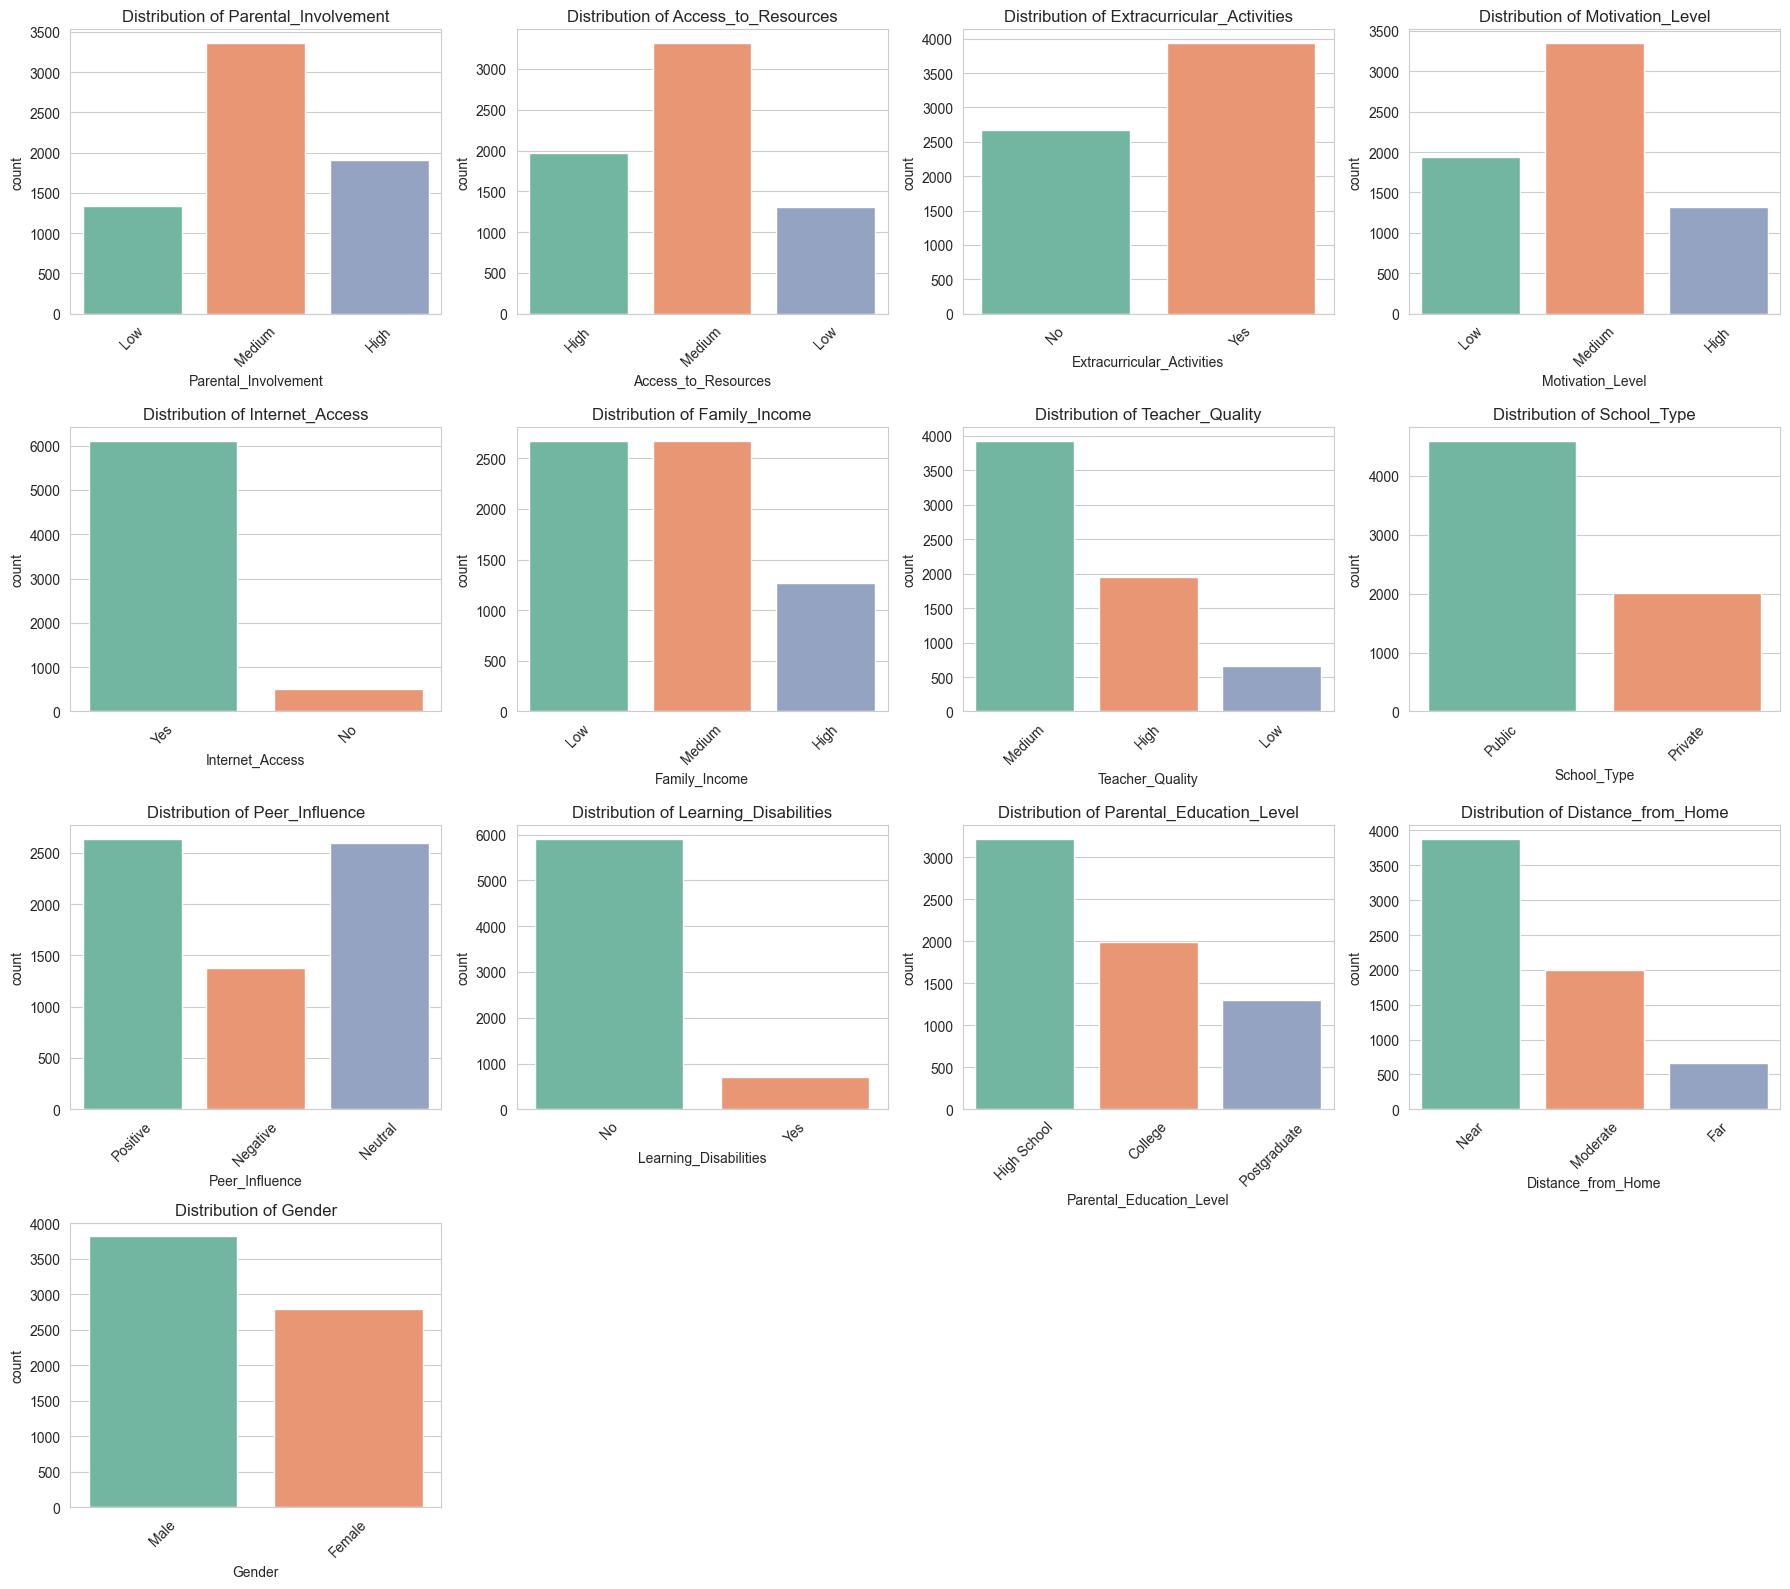

In [9]:
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 
    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
    'Parental_Education_Level', 'Distance_from_Home', 'Gender'
]

plt.figure(figsize=(18, 16))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)  
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2.3. Correlation Heatmap: Numerical Features
A heatmap displays the correlation between numerical variables.
This plot is useful for identifying strong relationships between features.

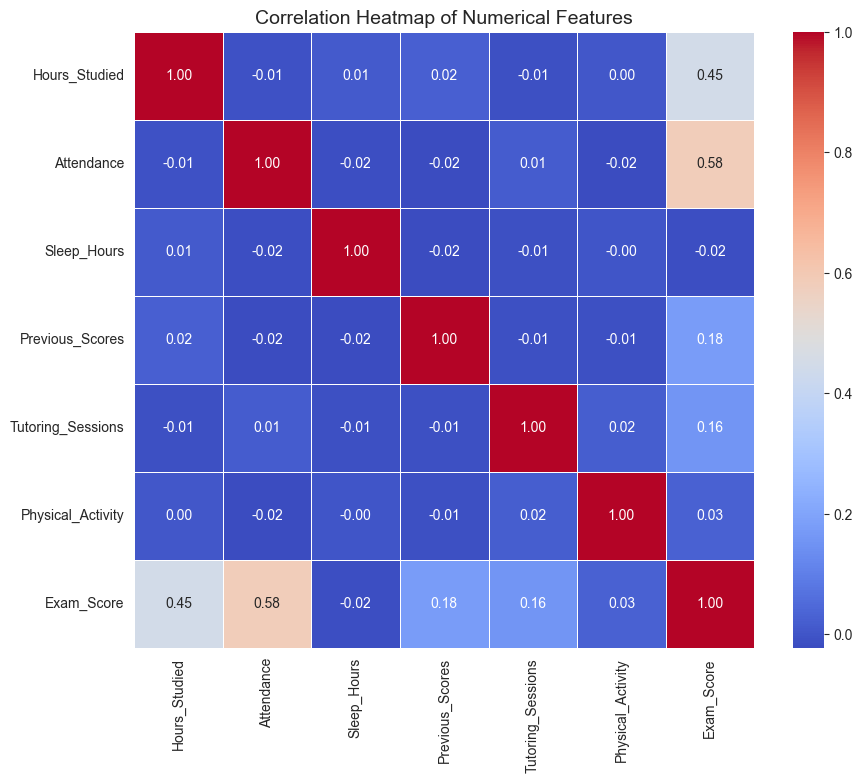

In [15]:
correlation_matrix = data[numerical_columns].corr()
sns.set_style("whitegrid")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)

plt.show()

# 3. Hypothesis Testing

In this section, we will explore some creative hypothesis tests to better understand the factors influencing student performance. Hypothesis testing allows us to make data-driven conclusions about relationships between variables and identify potential patterns or trends. By formulating hypotheses based on different features in the dataset, such as the impact of study time, parental involvement, or extracurricular activities on academic success, we can validate these assumptions through statistical tests. This approach will help us gain deeper insights into which factors are most significant in determining student performance.

# 3.1. Hypothesis 1: 
Students with more hours of study tend to have higher exam scores 

### Test:
- Null Hypothesis (H₀): There is no significant relationship between the number of hours studied and exam scores.
- Alternative Hypothesis (H₁): There is a significant positive relationship between the number of hours studied and exam scores.
### Solution:
Use Pearson’s correlation to test this hypothesis.
### P-value Interpretation:
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant positive correlation between hours studied and exam scores.
- If the p-value is greater than 0.05, there is no significant relationship.

Pearson Correlation: 0.44545495407528135, P-Value: 1.28635e-319
Reject the null hypothesis: There is a significant positive relationship between hours studied and exam score.


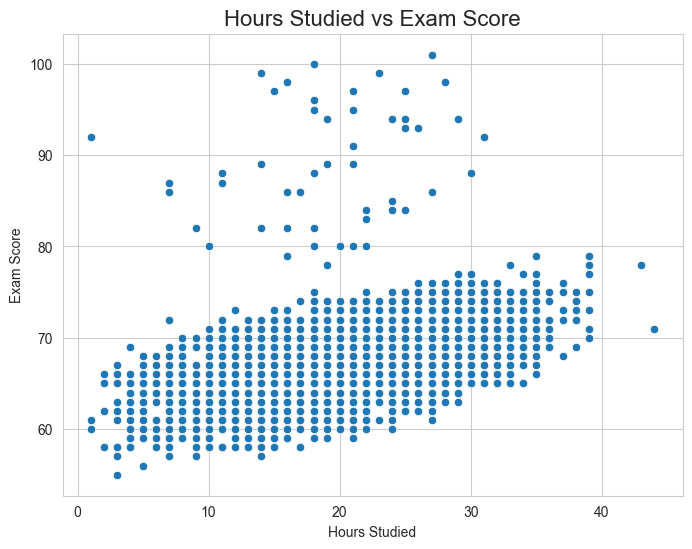

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

corr, p_value = pearsonr(data['Hours_Studied'], data['Exam_Score'])

print(f"Pearson Correlation: {corr}, P-Value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant relationship between hours studied and exam score.")
else:
    print("Reject the null hypothesis: There is a significant positive relationship between hours studied and exam score.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Hours_Studied'], y=data['Exam_Score'])
plt.title('Hours Studied vs Exam Score', fontsize=16)
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()



# 3.2. Hypothesis 2:

Students with high parental involvement perform better in exams.

### Test:
- Null Hypothesis (H₀): Parental involvement has no effect on student exam scores.
- Alternative Hypothesis (H₁): Students with high parental involvement tend to have higher exam scores.
### Solution:
We will use ANOVA to compare the mean exam scores across different levels of parental involvement.
### P-value Interpretation:
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a significant difference in exam scores between students with different levels of parental involvement.
- If the p-value is greater than 0.05, the hypothesis that parental involvement affects exam scores cannot be accepted.

ANOVA result: F-statistic = 84.48765484606227, P-value = 5.875479153325443e-37
Reject the null hypothesis: Parental involvement significantly affects exam scores.


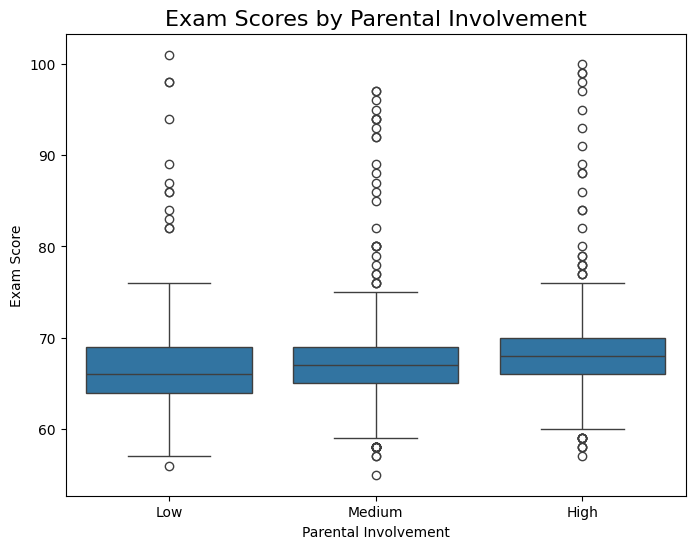

In [6]:
from scipy import stats


anova_result = stats.f_oneway(data[data['Parental_Involvement'] == 'Low']['Exam_Score'],
                              data[data['Parental_Involvement'] == 'Medium']['Exam_Score'],
                              data[data['Parental_Involvement'] == 'High']['Exam_Score'])

print(f"ANOVA result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")

alpha = 0.05
if anova_result.pvalue > alpha:
    print("Fail to reject the null hypothesis: Parental involvement does not significantly affect exam scores.")
else:
    print("Reject the null hypothesis: Parental involvement significantly affects exam scores.")


plt.figure(figsize=(8, 6))
sns.boxplot(x='Parental_Involvement', y='Exam_Score', data=data)
plt.title('Exam Scores by Parental Involvement', fontsize=16)
plt.xlabel('Parental Involvement')
plt.ylabel('Exam Score')
plt.show()

# 3.3. Hypothesis 3:

Students who participate in extracurricular activities perform better in exams

### Test:
- Null Hypothesis (H₀): There is no significant difference in exam scores between students who participate in extracurricular activities and those who do not.
- Alternative Hypothesis (H₁): Students who participate in extracurricular activities tend to have higher exam scores.
### Solution:
We will use a t-test to compare the exam scores between students who participate and those who do not.
### P-value Interpretation:
- If the p-value is less than 0.05, you can reject the null hypothesis and conclude that students who participate in extracurricular activities have significantly different exam scores than those who do not.
- If the p-value is greater than 0.05, there is no significant difference.

T-statistic: 5.2432536469508255, P-value: 1.6266777077313432e-07
Reject the null hypothesis: Students with extracurricular activities perform better in exams.


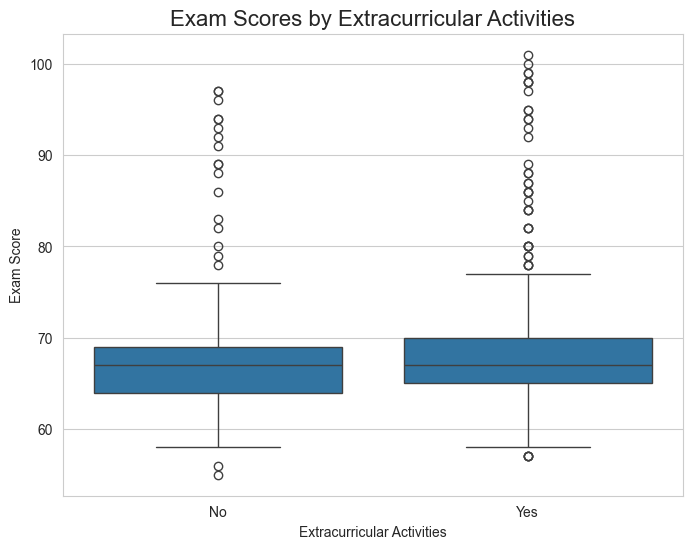

In [26]:



extracurricular_yes = data[data['Extracurricular_Activities'] == 'Yes']['Exam_Score']
extracurricular_no = data[data['Extracurricular_Activities'] == 'No']['Exam_Score']

t_stat, p_value = stats.ttest_ind(extracurricular_yes, extracurricular_no)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant difference in exam scores between students with and without extracurricular activities.")
else:
    print("Reject the null hypothesis: Students with extracurricular activities perform better in exams.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Extracurricular_Activities', y='Exam_Score', data=data)
plt.title('Exam Scores by Extracurricular Activities', fontsize=16)
plt.xlabel('Extracurricular Activities')
plt.ylabel('Exam Score')
plt.show()

# 3.4. Hypothesis 4:

Students with internet access perform better in exams.

### Test:
- Null Hypothesis (H₀): Internet access does not significantly affect exam scores.
- Alternative Hypothesis (H₁): Students with internet access tend to perform better in exams.
### Solution:
We will use a t-test to compare the exam scores between students with and without internet access.
### P-value Interpretation:
- If the p-value is less than 0.05, you can reject the null hypothesis and conclude that internet access does significantly affect exam performance.
- If the p-value is greater than 0.05, internet access does not significantly affect exam scores.

T-statistic: 4.188986958317149, P-value: 2.8385046310278915e-05
Reject the null hypothesis: Students with internet access perform better in exams.


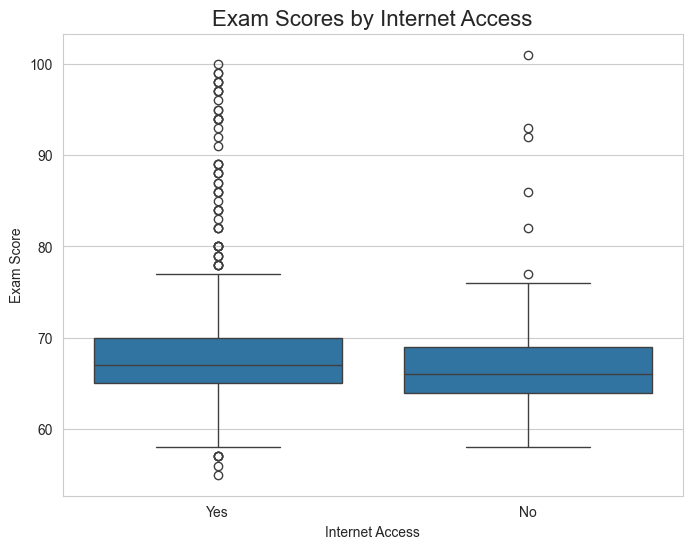

In [27]:

internet_yes = data[data['Internet_Access'] == 'Yes']['Exam_Score']
internet_no = data[data['Internet_Access'] == 'No']['Exam_Score']

t_stat, p_value = stats.ttest_ind(internet_yes, internet_no)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant difference in exam scores between students with and without internet access.")
else:
    print("Reject the null hypothesis: Students with internet access perform better in exams.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Internet_Access', y='Exam_Score', data=data)
plt.title('Exam Scores by Internet Access', fontsize=16)
plt.xlabel('Internet Access')
plt.ylabel('Exam Score')
plt.show()

# 3.5. Hypothesis 5:

Gender has no significant effect on exam performance.

### Test:
- Null Hypothesis (H₀): There is no significant difference in exam scores between male and female students.
- Alternative Hypothesis (H₁): There is a significant difference in exam scores between male and female students.

### Solution:
A t-test will compare exam scores between male and female students. A boxplot will help visualize the comparison.

### P-value Interpretation:
- If p-value > 0.05: Fail to reject H₀ → No significant difference in exam scores by gender.
- If p-value < 0.05: Reject H₀ → Gender significantly affects exam scores.

T-statistic: -0.16516987601406408, P-value: 0.8688153297340319
Fail to reject the null hypothesis: There is no significant difference in exam scores between male and female students.


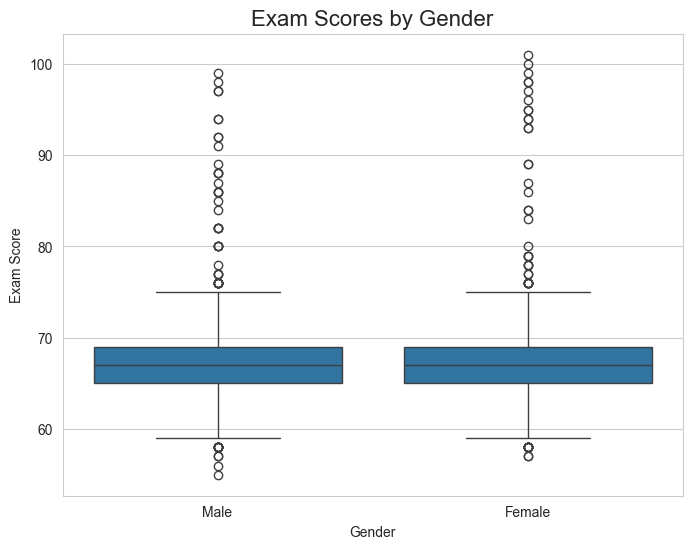

In [29]:

male_scores = data[data['Gender'] == 'Male']['Exam_Score']
female_scores = data[data['Gender'] == 'Female']['Exam_Score']

t_stat, p_value = stats.ttest_ind(male_scores, female_scores)

print(f"T-statistic: {t_stat}, P-value: {p_value}")
alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: There is no significant difference in exam scores between male and female students.")
else:
    print("Reject the null hypothesis: There is a significant difference in exam scores between male and female students.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Exam_Score', data=data)
plt.title('Exam Scores by Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Exam Score')
plt.show()

# 3.6. Hypothesis 6:

Sleep duration has a significant effect on exam scores.

### Test:
- Null Hypothesis (H₀): Sleep duration does not significantly impact exam scores.
- Alternative Hypothesis (H₁): Sleep duration significantly impacts exam scores.

### Solution:
A Pearson correlation test will analyze the relationship between sleep hours and exam scores. A scatter plot will help visualize this correlation.

### P-value Interpretation:
- If p-value > 0.05: Fail to reject H₀ → Sleep duration does not significantly affect exam scores.
- If p-value < 0.05: Reject H₀ → Sleep duration significantly affects exam scores.

Pearson Correlation: -0.01702162857150259, P-Value: 0.16653759133789678
Fail to reject the null hypothesis: Sleep duration does not significantly impact exam scores.


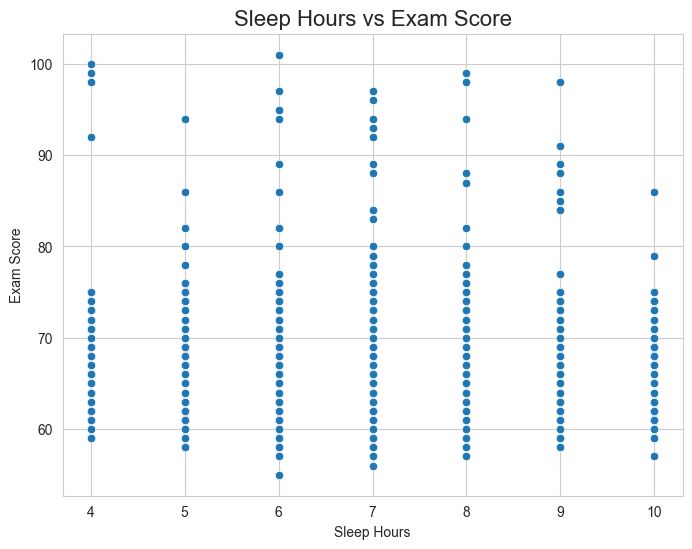

In [31]:


corr, p_value = pearsonr(data['Sleep_Hours'], data['Exam_Score'])

print(f"Pearson Correlation: {corr}, P-Value: {p_value}")


alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Sleep duration does not significantly impact exam scores.")
else:
    print("Reject the null hypothesis: Sleep duration has a significant effect on exam scores.")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Sleep_Hours'], y=data['Exam_Score'])
plt.title('Sleep Hours vs Exam Score', fontsize=16)
plt.xlabel('Sleep Hours')
plt.ylabel('Exam Score')
plt.show()


# 3.7. Hypothesis 7:

Family income has no significant effect on exam scores.

### Test:
- Null Hypothesis (H₀): Family income does not significantly impact exam performance.
- Alternative Hypothesis (H₁): Family income significantly impacts exam performance.

### Solution:
An ANOVA test will compare exam scores across different family income groups (low, middle, high). A boxplot will help visualize the difference.

### P-value Interpretation:
- If p-value > 0.05: Fail to reject H₀ → Family income does not significantly affect exam scores.
- If p-value < 0.05: Reject H₀ → Family income significantly affects exam scores.


ANOVA result: F-statistic = 29.79386131613895, P-value = 1.3143686049770217e-13
Reject the null hypothesis: Family income significantly affects exam scores.


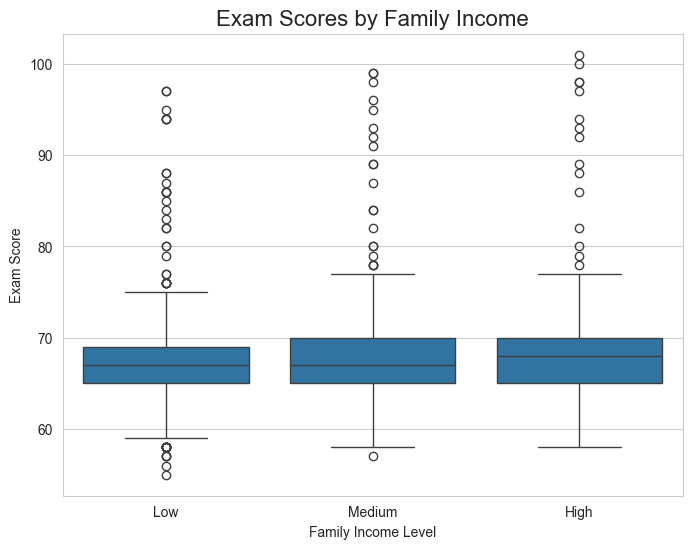

In [34]:

anova_result = stats.f_oneway(data[data['Family_Income'] == 'Low']['Exam_Score'],
                              data[data['Family_Income'] == 'Medium']['Exam_Score'],
                              data[data['Family_Income'] == 'High']['Exam_Score'])

print(f"ANOVA result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")
alpha = 0.05
if anova_result.pvalue > alpha:
    print("Fail to reject the null hypothesis: Family income does not significantly affect exam scores.")
else:
    print("Reject the null hypothesis: Family income significantly affects exam scores.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='Family_Income', y='Exam_Score', data=data)
plt.title('Exam Scores by Family Income', fontsize=16)
plt.xlabel('Family Income Level')
plt.ylabel('Exam Score')
plt.show()

# 3.8. Hypothesis 8:

Students attending private schools perform better than those in public schools.

### Test:
- Null Hypothesis (H₀): There is no significant difference in exam scores between private and public school students.
- Alternative Hypothesis (H₁): There is a significant difference in exam scores between private and public school students.

### Solution:
A t-test will compare exam scores between students in public and private schools. A boxplot will help visualize the comparison.

### P-value Interpretation:
- If p-value > 0.05: Fail to reject H₀ → School type does not significantly affect exam scores.
- If p-value < 0.05: Reject H₀ → School type significantly affects exam scores.


T-statistic: 0.7187537041931684, P-value: 0.47231811262174417
Fail to reject the null hypothesis: School type does not significantly affect exam scores.


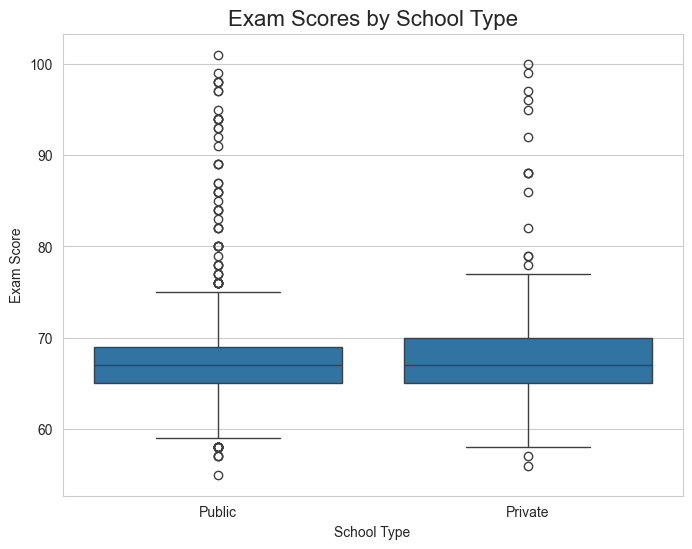

In [37]:

private_scores = data[data['School_Type'] == 'Private']['Exam_Score']
public_scores = data[data['School_Type'] == 'Public']['Exam_Score']

t_stat, p_value = stats.ttest_ind(private_scores, public_scores)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: School type does not significantly affect exam scores.")
else:
    print("Reject the null hypothesis: School type significantly affects exam scores.")

plt.figure(figsize=(8, 6))
sns.boxplot(x='School_Type', y='Exam_Score', data=data)
plt.title('Exam Scores by School Type', fontsize=16)
plt.xlabel('School Type')
plt.ylabel('Exam Score')
plt.show()

# 3.9. Hypothesis 9: 

Tutoring sessions have no significant effect on exam scores.

### Test:
- Null Hypothesis (H₀): Attending tutoring sessions does not significantly affect exam scores.
- Alternative Hypothesis (H₁): Attending tutoring sessions significantly affects exam scores.

### Solution:
A Pearson correlation test will analyze the relationship between tutoring sessions and exam scores. A scatter plot will help visualize this correlation.

### P-value Interpretation:
- If p-value > 0.05: Fail to reject H₀ → Tutoring does not significantly affect exam scores.
- If p-value < 0.05: Reject H₀ → Tutoring significantly affects exam scores.

Correlation: 0.1565251853922532, P-value: 1.6508174156274133e-37
Reject the null hypothesis: Tutoring significantly affects exam scores.


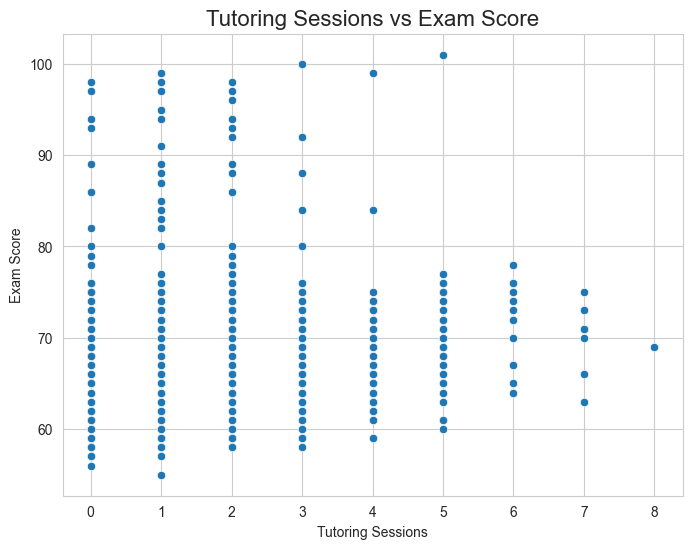

In [38]:

corr, p_value = pearsonr(data['Tutoring_Sessions'], data['Exam_Score'])

print(f"Correlation: {corr}, P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    print("Fail to reject the null hypothesis: Tutoring does not significantly affect exam scores.")
else:
    print("Reject the null hypothesis: Tutoring significantly affects exam scores.")
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Tutoring_Sessions'], y=data['Exam_Score'])
plt.title('Tutoring Sessions vs Exam Score', fontsize=16)
plt.xlabel('Tutoring Sessions')
plt.ylabel('Exam Score')
plt.show()



# Conclusion


Through this analysis, we explored various factors influencing student exam performance using statistical hypothesis testing and visualizations. We examined the impact of study habits, sleep duration, parental involvement, extracurricular activities, internet access, gender, family income, school type, and tutoring sessions on exam scores. Using t-tests, ANOVA, and correlation tests, we determined which variables significantly affect performance. The p-value interpretations helped us accept or reject hypotheses, providing valuable insights into student success. Our findings highlight the importance of study time, parental support, and access to resources in academic achievement.

# Future Work 
Future research could include more features, larger datasets, or machine learning models for deeper insights.